<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<center>
<img src="oxDNA.png">
</center>

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Ico_3p</font></h2> 

In [1]:
from umbrella_sampling import ComUmbrellaSampling, MeltingUmbrellaSampling
from oxdna_simulation import SimulationManager, Simulation, Observable
from wham_analysis import collect_coms
import os
import matplotlib.pyplot as plt
from vmmc import *
from collections import Counter
from parameter_search import * 
import numpy as np
from skopt import Optimizer
from skopt.space import Categorical, Space
from scipy.special import logsumexp
from copy import deepcopy
from numba import jit
plt.style.use(['science', 'no-latex', 'bright'])
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
path = os.path.abspath('/scratch/matthew/ipy_oxDNA/ipy_oxdna_examples/ico_3p/')

system_name = 'inital_umbrella'

conditions = ['k1_xmax10_nwin56_50C']

systems = [f'{condition}' for condition in conditions]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


monomer_1_patch_1 = '11674,11666,11667,11668,11669,11670,11671,11672,11673'
monomer_1_patch_2 = '12945,12953,12946,12947,12948,12949,12950,12951,12952'
monomer_1_patch_3 = '13320,13328,13321,13322,13323,13324,13325,13326,13327'

monomer_2_patch_1 = '6655,6663,6656,6657,6658,6659,6660,6661,6662'
monomer_2_patch_2 = '6358,6350,6351,6352,6353,6354,6355,6356,6357'
monomer_2_patch_3 = '5752,5744,5745,5746,5747,5748,5749,5750,5751'

monomer_1_patch_1 = ','.join(sorted(monomer_1_patch_1.split(','))[::-1])
monomer_1_patch_2 = ','.join(sorted(monomer_1_patch_2.split(','))[::-1])
monomer_1_patch_3 = ','.join(sorted(monomer_1_patch_3.split(','))[::-1])

monomer_2_patch_1 = ','.join(sorted(monomer_2_patch_1.split(',')))
monomer_2_patch_2 = ','.join(sorted(monomer_2_patch_2.split(',')))
monomer_2_patch_3 = ','.join(sorted(monomer_2_patch_3.split(',')))

monomer_1 = f'{monomer_1_patch_1},{monomer_1_patch_2},{monomer_1_patch_3}'
monomer_2 = f'{monomer_2_patch_1},{monomer_2_patch_2},{monomer_2_patch_3}'


xmin = 0
xmax = 10
n_windows = 56
starting_r0 = 0.0910
stiff = 15
print_every = 1e4
temperature = '50C'
name = 'all_observables.txt'

pre_eq_steps = 5e6
eq_steps = 2e8
prod_steps = 1e9

verlet_skin = 0.5

hb_contact_filename = 'hb_contacts.txt'
particle_indexes = [monomer_1, monomer_2]
hb_contact_observable = [{'idx':particle_indexes, 'name':f'{hb_contact_filename}', 'print_every':int(print_every)}]


pre_equlibration_parameters_list = [{'steps':f'{pre_eq_steps}','print_energy_every': f'{pre_eq_steps}',
                           'print_conf_interval':f'{pre_eq_steps}', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'T':f'{temperature}', 'verlet_skin': f'{verlet_skin}' }
                            for _ in conditions]

equlibration_parameters_list = [{'steps':f'{eq_steps}','print_energy_every': f'{eq_steps}',
                           'print_conf_interval':f'{eq_steps/10}', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'T':f'{temperature}', 'verlet_skin': f'{verlet_skin}'}
                            for _ in conditions]

production_parameters_list = [{'steps':f'{prod_steps}','print_energy_every': f'{prod_steps}',
                           'print_conf_interval':f'{prod_steps/10}', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'T':f'{temperature}', 'verlet_skin': f'{verlet_skin}'}
                            for _ in conditions]

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]

simulation_manager = SimulationManager()

In [35]:
for us, pre_equlibration_parameters in zip(us_list, pre_equlibration_parameters_list):
    print(us.system)
    us.build_pre_equlibration_runs(simulation_manager, n_windows, monomer_1, monomer_2,
                               stiff, xmin, xmax, pre_equlibration_parameters, starting_r0, pre_eq_steps,
                               print_every=print_every, observable=True, protein=None,
                               force_file=None, continue_run=False, name=name, custom_observable=hb_contact_observable)

k1_xmax10_nwin56_50C


In [36]:
simulation_manager.run(gpu_mem_block=False)

spawning


Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49
Running: 50
Running: 51
Running: 52
Running: 53
Running: 54
Running: 55
Run time: 1865.0879214517772
Finished: 7
Run time: 1874.1349232308567
Finished: 1
Run time: 1870.904309405014
Finished: 5
Run time: 1864.5610940083861
Finished: 15
Run time: 1873.480094006285
Finished: 9
Run time: 1879.6250901408494
Finished: 12
Run time: 1883.8020035922527
Finished: 13
Run time: 1887.0774166584015
Finished: 14
Run time

In [8]:
simulation_manager.terminate_all()

In [63]:
for us, equlibration_parameters in zip(us_list, equlibration_parameters_list):
    print(us.system)
    us.build_equlibration_runs(simulation_manager, n_windows, monomer_1, monomer_2,
                               stiff, xmin, xmax, equlibration_parameters, print_every=print_every,
                               observable=True, protein=None, force_file=None, continue_run=False, name=name, custom_observable=hb_contact_observable)

k1_xmax10_nwin56_50C


In [ ]:
simulation_manager.run(gpu_mem_block=False)

spawning


Running: 0


Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49
Running: 50
Running: 51
Running: 52
Running: 53
Running: 54
Running: 55


In [3]:
for us, production_parameters in zip(us_list, production_parameters_list):
    print(us.system)
    us.build_production_runs(simulation_manager, n_windows, monomer_1, monomer_2,
                             stiff, xmin, xmax, production_parameters,
                             observable=True, print_every=print_every ,protein=None,
                             force_file=None, continue_run=False, name=name, custom_observable=hb_contact_observable)

k1_xmax10_nwin56_50C


In [4]:
simulation_manager.run(gpu_mem_block=False)

spawning


Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49
Running: 50
Running: 51
Running: 52
Running: 53
Running: 54
Running: 55


In [ ]:
for sim in us_list[0].pre_equlibration_sims[0:1]:
    sim.analysis.view_init()

In [9]:
wham_dir = os.path.abspath('/scratch/matthew/ipy_oxDNA/src/wham/wham')
n_bins = '400'
tol = '1e-12'
n_boot = '0'

monomer_1 = f'{monomer_1_patch_1},{monomer_1_patch_2},{monomer_1_patch_3}'
monomer_2 = f'{monomer_2_patch_1},{monomer_2_patch_2},{monomer_2_patch_3}'


xmin = 0
xmax = 55
n_windows = 56
starting_r0 = 21.6872
stiff = 0.5
print_every = 1e4
temperature = '50C'
name = 'all_observables.txt'

pre_eq_steps = 1e6
eq_steps = 1e8
prod_steps = 1e9

for us in us_list:
    us.observables_list = []
    us.com_distance_observable(monomer_1, monomer_2, print_every=print_every, name=name)
    us.hb_list_observable(print_every=print_every, only_count='true', name=name)
    us.force_energy_observable(print_every=print_every, name=name)
    us.potential_energy_observable(print_every=print_every, name=name)

for us in us_list:
    us.wham_run(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot, all_observables=True)
    
n_chunks = 2
data_added_per_iteration = 3

for us in us_list:
    us.wham.get_n_data_per_com_file()
    us.convergence_analysis(n_chunks, data_added_per_iteration, wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

Running WHAM analysis...
WHAM analysis completed
[0, 10304, 20608]
Running WHAM analysis...
WHAM analysis completed
Running WHAM analysis...
WHAM analysis completed
chunk convergence analysis
[0, 6869, 13738, 20607]
Running WHAM analysis...
WHAM analysis completed
Running WHAM analysis...
WHAM analysis completed
Running WHAM analysis...
WHAM analysis completed
chunk convergence analysis


In [ ]:
for us in us_list:
    us.wham.plot_truncated_free_energy()
    plt.legend()
    plt.title(us.system)
    us.wham.plot_chunks_free_energy()
    plt.legend()
    plt.title(us.system)

In [15]:
temp_range = np.linspace(45, 65, 41)
temp_range

array([45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. ,
       50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5, 55. , 55.5,
       56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. , 60.5, 61. ,
       61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. ])

In [35]:
xmin = 0
xmax = 55
# temp_range = np.linspace(45, 65, 41)
# temp_range = np.array([50])
temp_range = np.array([20, 30, 40, 45, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 70, 80])
n_bins = 400
max_hb = 27
epsilon = 1e-6
convergence_slice = 2

us_list[0].wham_cont_and_disc_temp_interp_converg_analysis(convergence_slice, temp_range,
                                                           n_bins, xmin, xmax,max_hb,
                                                           epsilon=epsilon, reread_files=False,
                                                           all_observables=True)

# us_list[0].discrete_temp_interp_converg_analysis(convergence_slice, max_hb, temp_range, reread_files=False, all_observables=True)


WHAM | 13000/? [00:38<00:00, 339.37it/s, Convergence: 0.0000016 / 1e-06]


Converged in [13770] iterations


WHAM | 13000/? [00:36<00:00, 355.01it/s, Convergence: 0.0000011 / 1e-06]


Converged in [13159] iterations
54.50901803607214
54.50901803607214


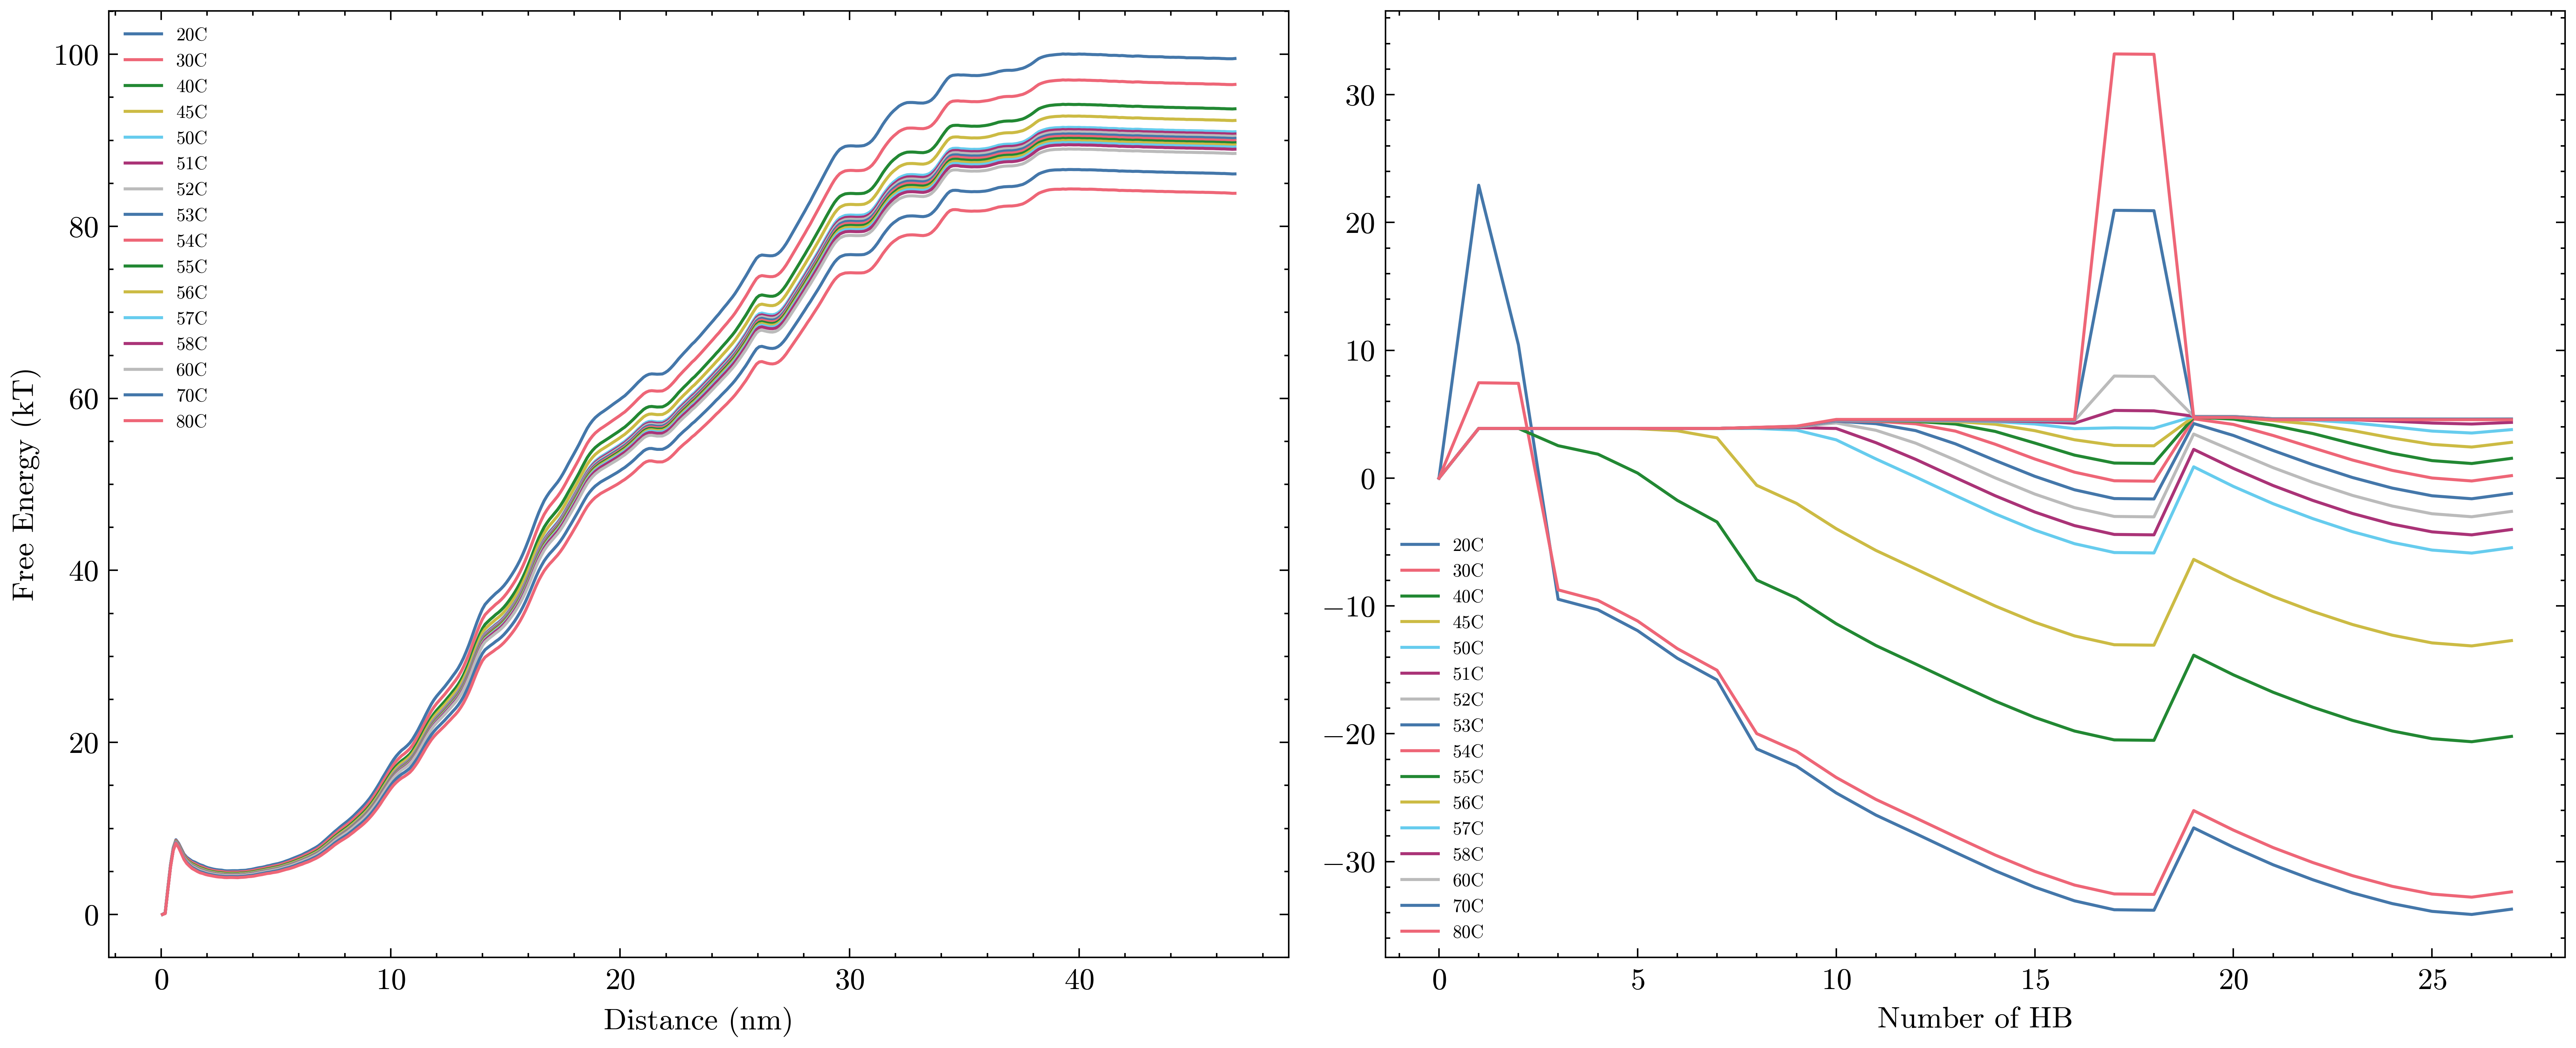

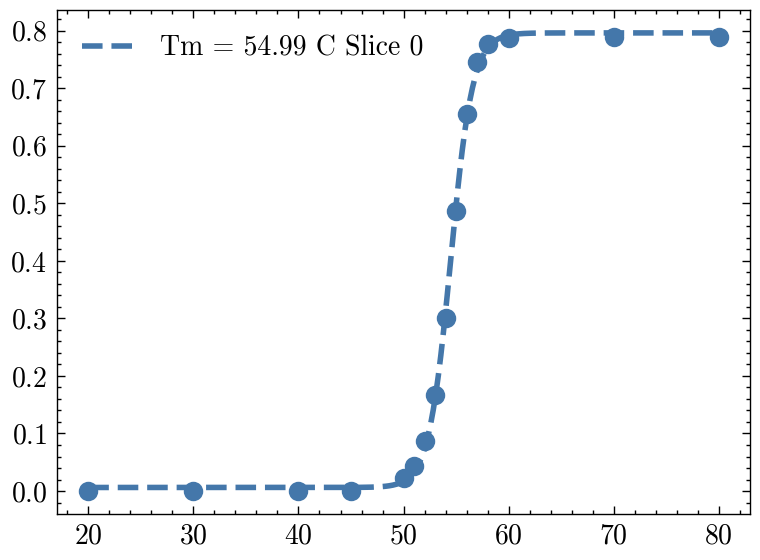

In [34]:
calculated_bin_centers, bin_edges = us_list[0].get_bins(xmin, xmax, n_bins=n_bins)

fig, (ax1, ax2) = plt.subplots(1,2, dpi=600, figsize=(12,5), tight_layout=True)
fig, ax = plt.subplots(dpi=200, figsize=(4,3), tight_layout=True)

ax1.set_xlabel('Distance (nm)')
ax2.set_xlabel('Number of HB')

ax1.set_ylabel('Free Energy (kT)')
# ax2.set_ylabel('Free Energy (kT)')

# ax1.set_xlim(-0.6,14.5)
# ax2.set_xlim(-0.6,29)
# ax1.set_ylim(-0.6,20)

for idx, free in enumerate(us_list[0].convergence_free):            
    sub_index = free[0].argmin()
    for f, temp_val in zip(free, temp_range):
        if idx == 0:
            ax1.plot(calculated_bin_centers*0.8518, f - f[sub_index], label=f'{temp_val}C') 
        else:
            ax1.plot(calculated_bin_centers*0.8518, f - f[sub_index])
        
ax1.legend(fontsize=6)


for idx, free_discrete in enumerate(us_list[0].convergence_discrete_free_energy):
    for f_discrete, temp_val in zip(free_discrete, temp_range):
        if idx == 0:
            ax2.plot(range(max_hb+1), f_discrete - f_discrete[0], label=f'{temp_val}C')
        else:
            ax2.plot(range(max_hb+1), f_discrete - f_discrete[0])
ax2.legend(fontsize=6)

label = ''

for idx, (inverted_finfs, x_fit, y_fit, Tm) in enumerate(zip(us_list[0].convergence_inverted_finfs, us_list[0].convergence_x_fit, us_list[0].convergence_y_fit, us_list[0].convergence_Tm)):
    ax.scatter(temp_range, inverted_finfs, marker='o')
    ax.plot(x_fit, y_fit, linestyle='--', linewidth=2, label=f'Tm = {Tm:.2f} C Slice {idx}')
    # ax.axvline(x=Tm, color='r', linestyle='--', linewidth=2, label=f'{label}Tm = {Tm:.2f} °C')
    ax.legend()   

In [ ]:
us_list[0].production_sims[0].analysis.view_last()

In [ ]:
us_list[0].convergence_discrete_free_energy

In [ ]:
for sim in us_list[0].production_sims[0:5]:
    sim.analysis.view_last()

In [5]:
for us in us_list:
    us.observables_list = []
    us.com_distance_observable(monomer_1, monomer_2, print_every=print_every, name=name)
    us.hb_list_observable(print_every=print_every, only_count='true', name=name)
    us.force_energy_observable(print_every=print_every, name=name)
    us.kinetic_energy_observable(print_every=print_every, name=name)
    us.potential_energy_observable(print_every=print_every, name=name)

all_observables = []
for us in us_list:
    all_observables.append(us.analysis.read_all_observables('prod'))

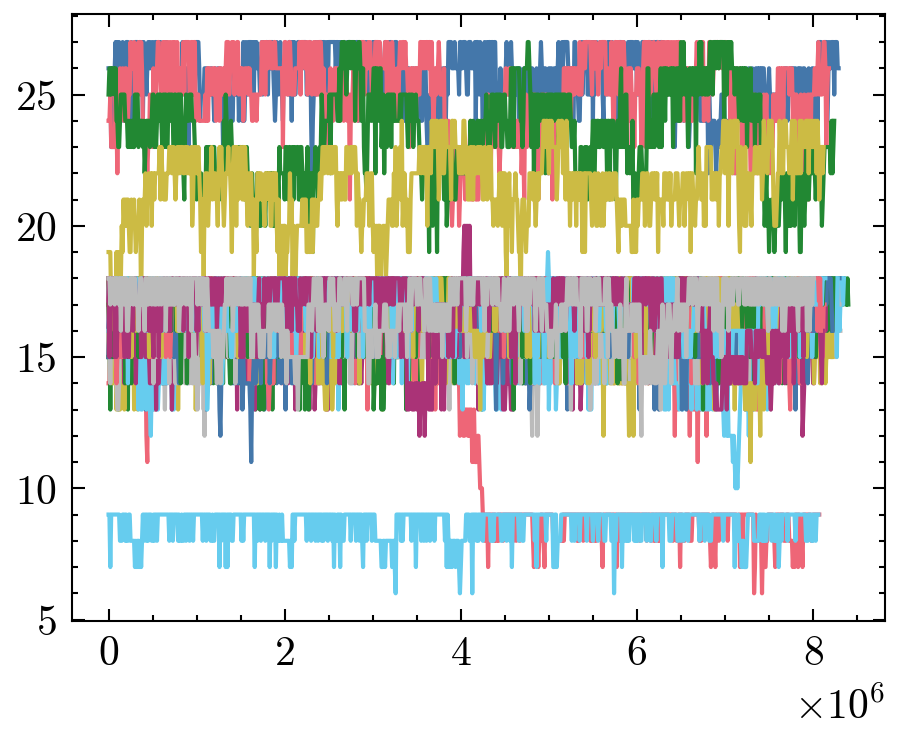

In [6]:
names = ['backbone', 'bonded_excluded_volume', 'stacking', 'nonbonded_excluded_volume', 'hydrogen_bonding', 'cross_stacking', 'coaxial_stacking', 'debye_huckel']
columns = ['com_distance', 'hb_list', 'force_energy', *names]

my_obs = all_observables[0]

fig, ax = plt.subplots(dpi=300)
for idx, obs in enumerate(my_obs):
    plt.plot(obs['steps'], obs['hb_list'].rolling(window=1).mean(), label=f'{idx}', linewidth=1)
# plt.legend(fontsize=1)

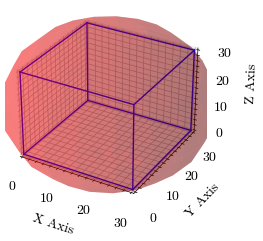

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Side length of the cube
a = 30

# Coordinates for the cube
cube = np.array([[0, 0, 0], [a, 0, 0], [a, a, 0], [0, a, 0],  # Bottom face
                 [0, 0, a], [a, 0, a], [a, a, a], [0, a, a]]) # Top face

# Lines to connect the corners of the cube
lines = [[cube[i], cube[j]] for i, j in [(0, 1), (1, 2), (2, 3), (3, 0),  # Bottom face
                                         (4, 5), (5, 6), (6, 7), (7, 4),  # Top face
                                         (0, 4), (1, 5), (2, 6), (3, 7)]] # Sides

# Plot the cube
for line in lines:
    ax.plot3D(*zip(*line), color="b")

# Create a sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
radius = a / 2 * np.sqrt(3)

# Adjust the sphere coordinates to be centered in the cube and with correct radius
x_corrected = radius * np.cos(u) * np.sin(v) + a/2
y_corrected = radius * np.sin(u) * np.sin(v) + a/2
z_corrected = radius * np.cos(v) + a/2

# Plot the sphere
ax.plot_surface(x, y, z, color='r', alpha=0.3)

# Set plot limits and labels
ax.set_xlim([0, a])
ax.set_ylim([0, a])
ax.set_zlim([0, a])
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Show the plot
plt.show()


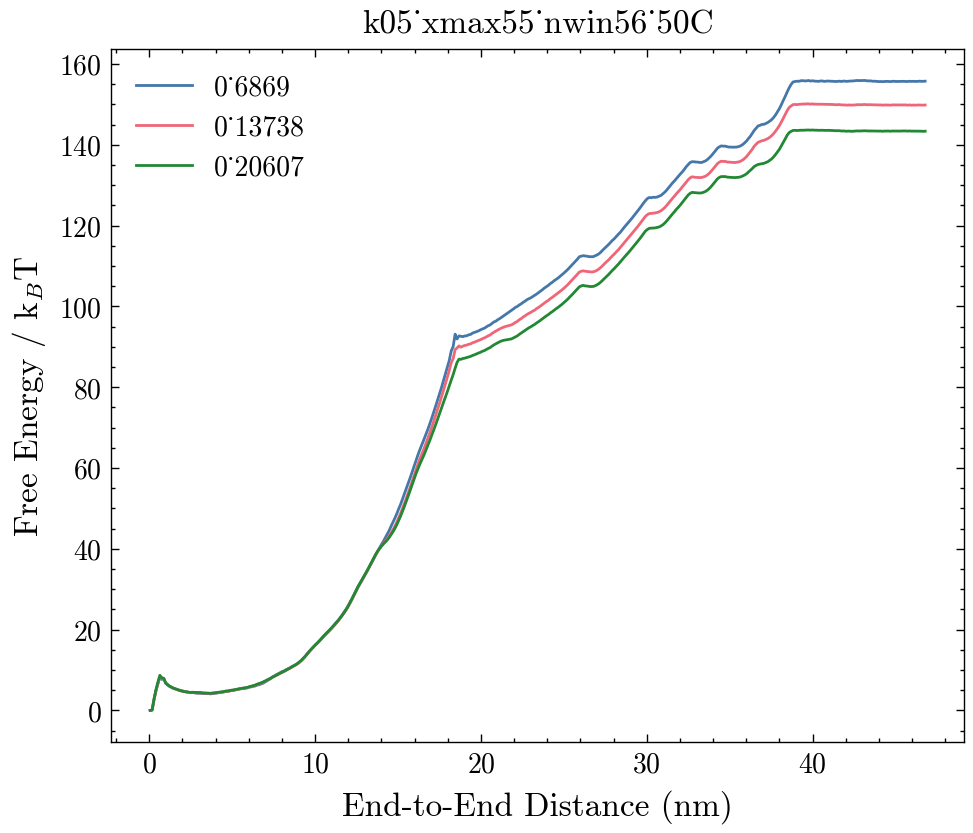

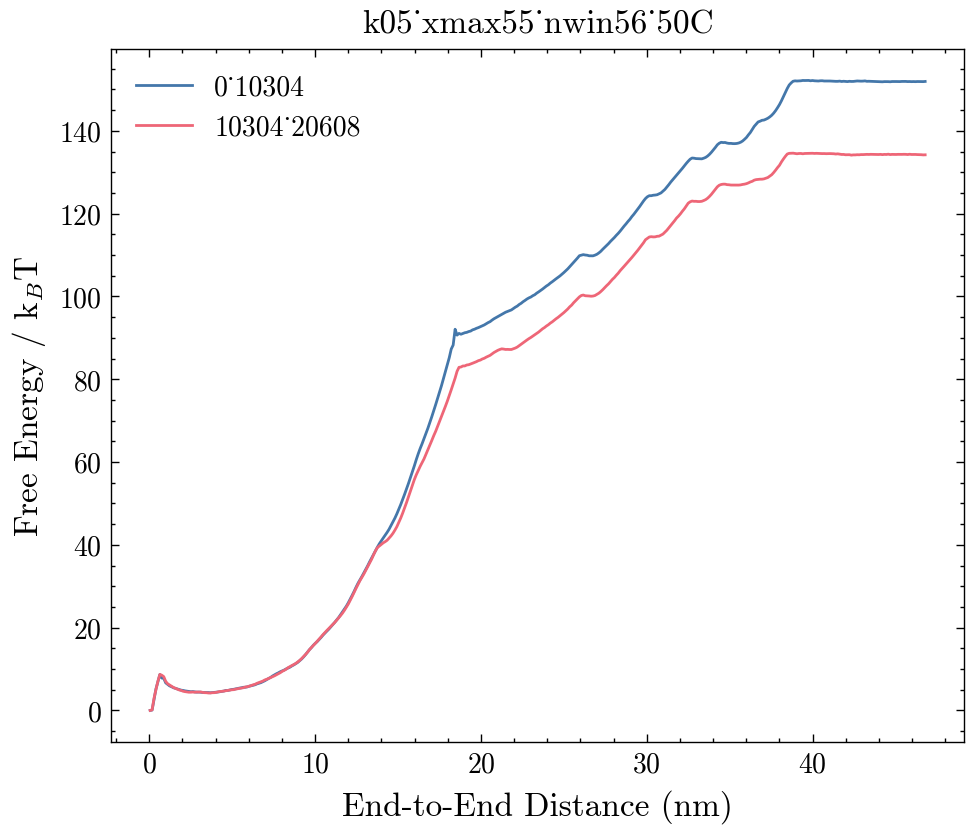

In [15]:
for us in us_list:
    us.wham.plot_truncated_free_energy()
    plt.legend()
    plt.title(us.system)
    us.wham.plot_chunks_free_energy()
    plt.legend()
    plt.title(us.system)

In [ ]:
sim.oxpy_run.cms_obs((monomer_1_patch_1, monomer_2_patch_1), name='com_distance.txt', print_every=int(print_every))
sim.build(clean_build='force')
sim.oxpy_run.run()

In [ ]:
sim.oxpy_run.process.terminate()

In [ ]:
A = 0.34
B = 2
cupy_array = np.random.random((2, 100, 3))
cupy_array = A + (B-A) * cupy_array

In [ ]:
A = 0
B = 2.4
# cupy_array = np.random.random((2, 9, 3))
# cupy_array = A + (B-A) * cupy_array
new_pos = np.full((1), 1.5)
# new_pos = np.full((1, 9, 3), 1.5)

# pos = np.zeros((cupy_array.shape[1], cupy_array.shape[2]), dtype=np.float64)
# np.subtract(cupy_array[0], cupy_array[1], out=pos, dtype=np.float64)
# new_pos = np.linalg.norm(pos, axis=1)
r0 = np.full(new_pos.shape, 1.2*1.5)
gamma = 58.7
denominator = 1 + np.exp((new_pos - r0)*gamma)
term = 1 / denominator
final = np.sum(term) / np.float64(cupy_array.shape[1])
print(final)
print(new_pos)

def op(new_pos, gamma, r0, shape):
    return np.sum(1 / (1 + np.exp((new_pos - r0*shape)*gamma))) / np.float64(new_pos.shape[0])

In [ ]:
def op(new_pos, gamma, r0, shape):
    return np.sum(1 / (1 + np.exp((new_pos - r0*shape)*gamma))) / np.float64(new_pos.shape[0])

r0 = 1.2
shape = 1.5
gamma = 58.7

x_vals = np.linspace(0, 2.4, 100)
y_vals = [op(np.array([x_val]), gamma, r0, shape) for x_val in x_vals]


plt.plot(x_vals, y_vals)

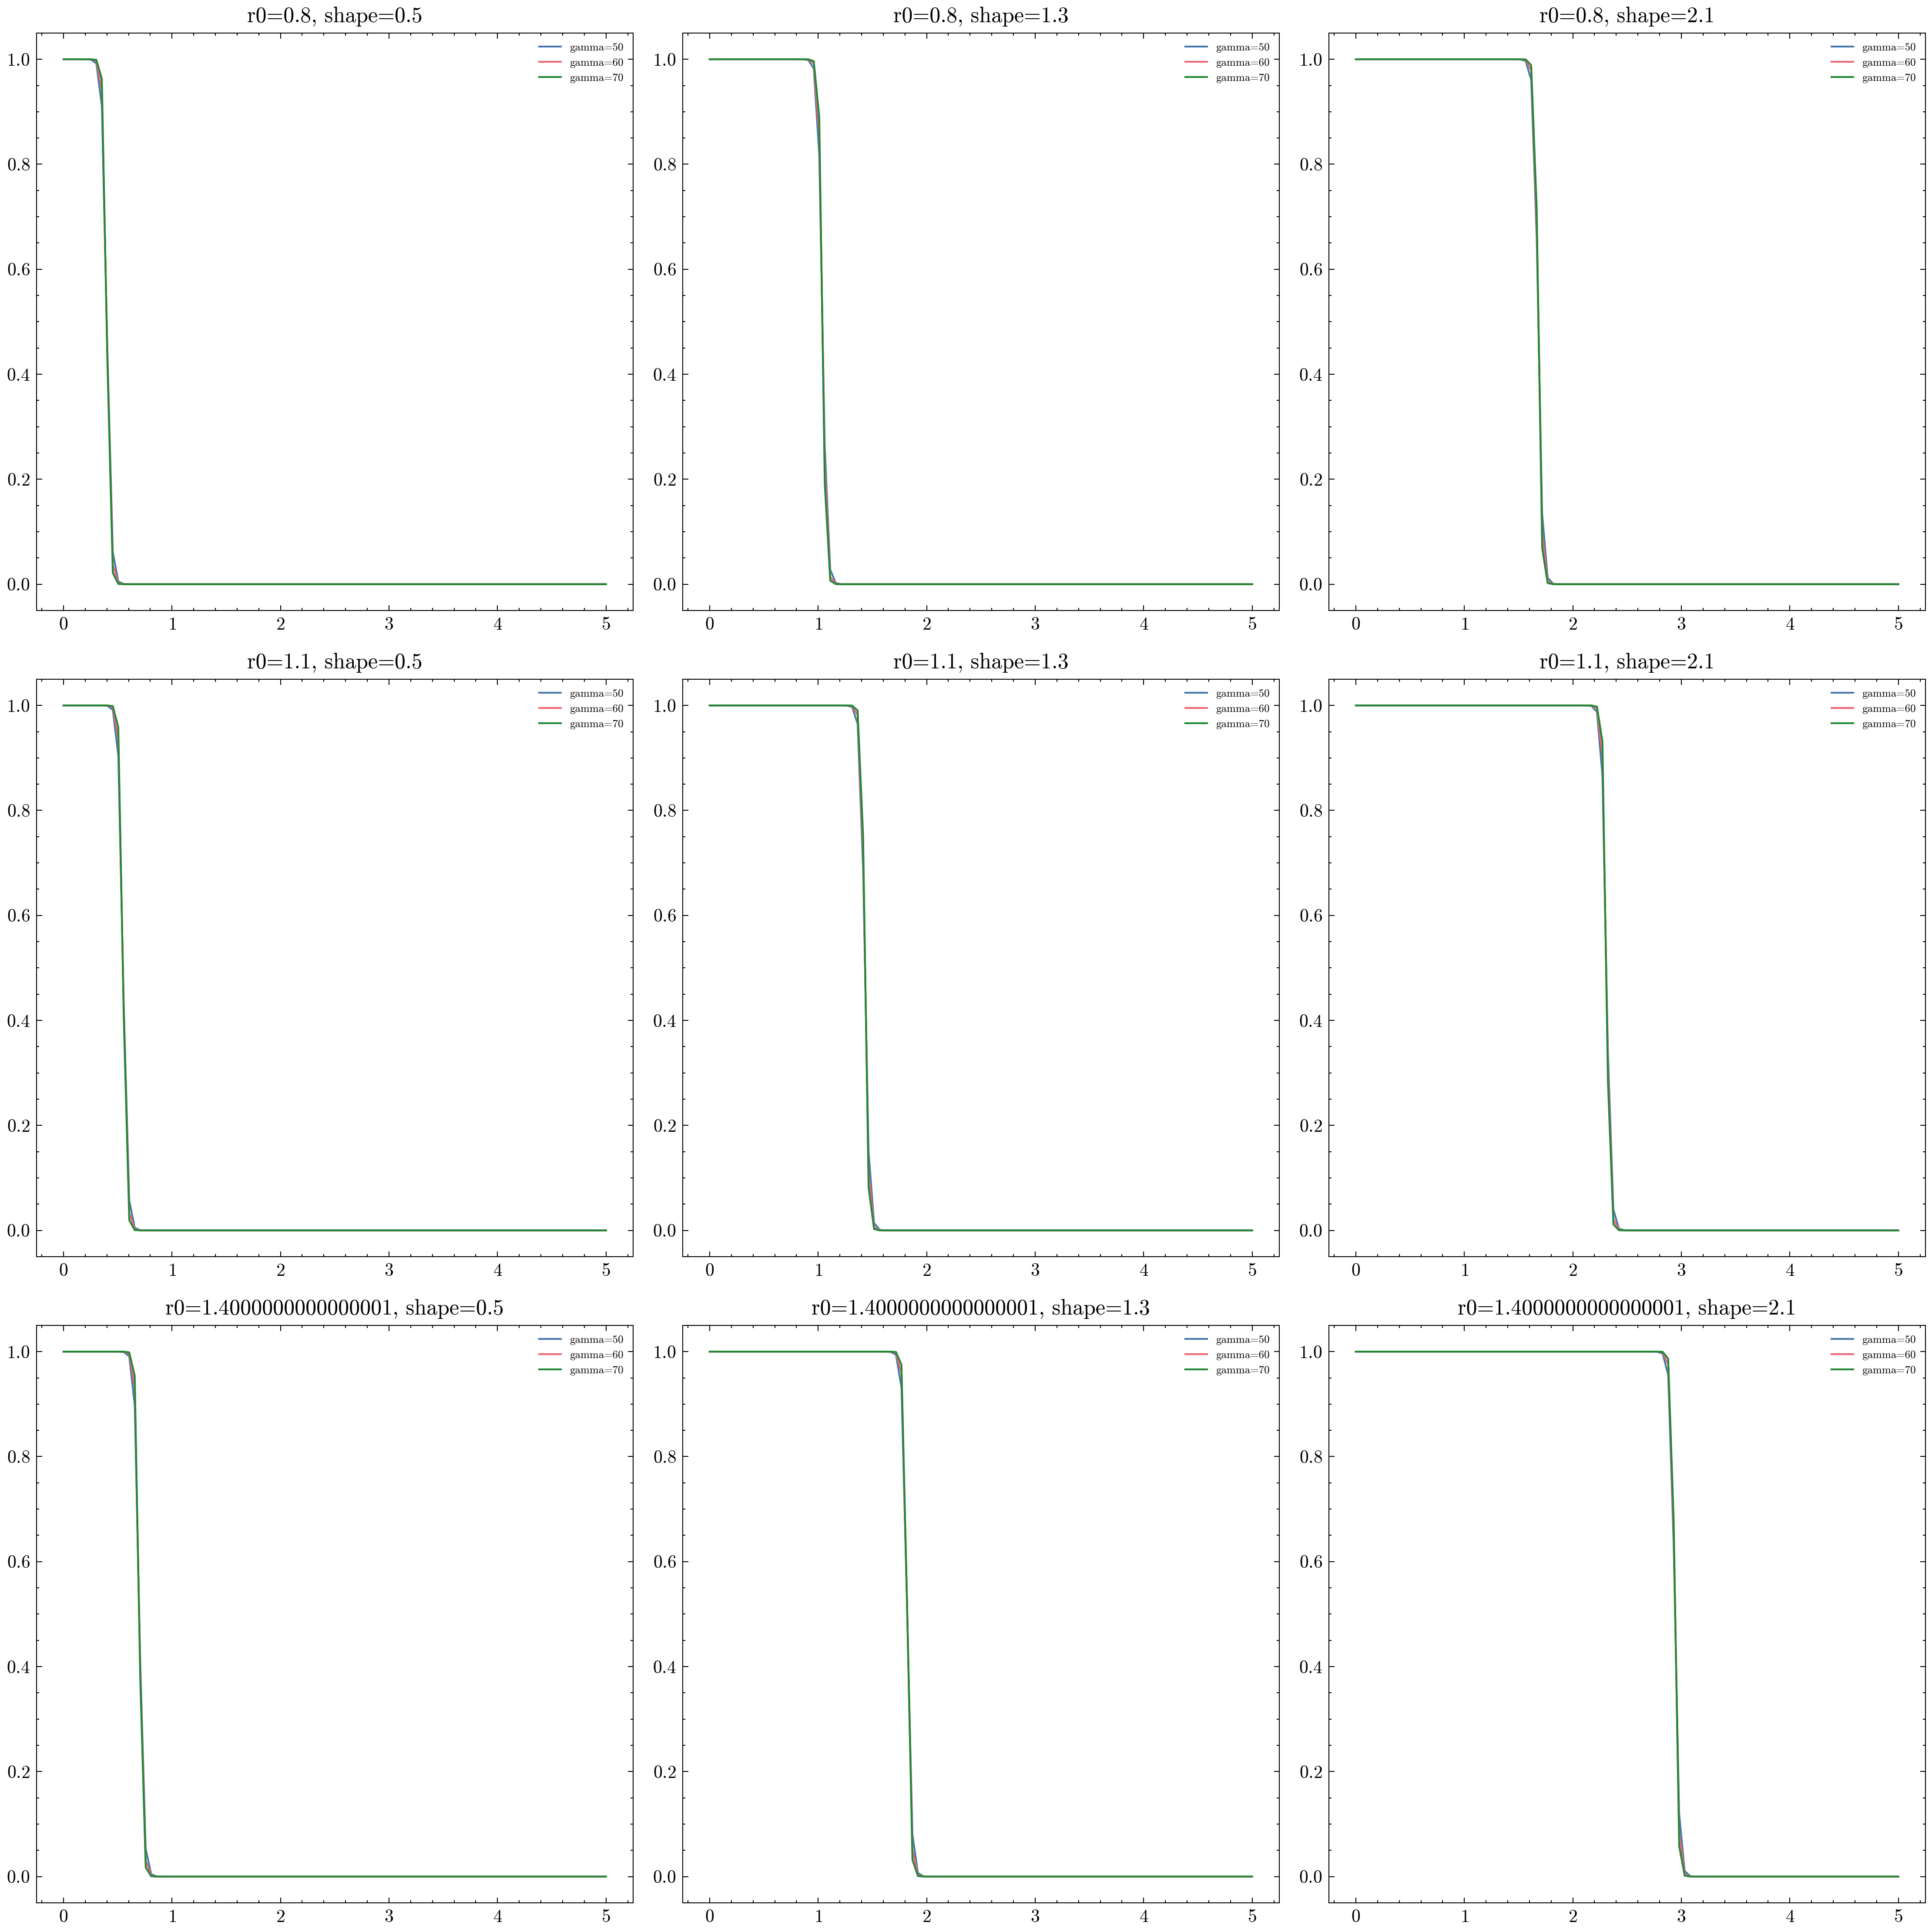

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def op(new_pos, gamma, r0, shape):
    return np.sum(1 / (1 + np.exp((new_pos - r0*shape)*gamma))) / np.float64(new_pos.shape[0])

def v_gauss(new_pos, gamma, r0, shape):
    return np.exp(-gamma * (new_pos - r0*shape)**2

gamma_values = np.arange(50, 71, 10)
r0_values = np.arange(0.8, 1.5, 0.3)
shape_values = np.arange(0.5, 2.2, 0.8)

x_vals = np.linspace(0, 5, 100)

fig, axs = plt.subplots(len(r0_values), len(shape_values), figsize=(15, 15), dpi=300)

for i, r0 in enumerate(r0_values):
    for j, shape in enumerate(shape_values):
        for gamma in gamma_values:
            y_vals = [op(np.array([x_val]), gamma, r0, shape) for x_val in x_vals]
            axs[i, j].plot(x_vals, y_vals, label=f'gamma={gamma}')
        axs[i, j].legend(fontsize=6)
        axs[i, j].set_title(f'r0={r0}, shape={shape}')

plt.tight_layout()
plt.show()

The Gaussian biasing potential \( V \) in a metadynamics simulation is given by:

$$
V(x_1, y_1, z_1, x_2, y_2, z_2, r_0, \gamma, \lambda, h, \sigma, s_{\text{Prev}}) = h \cdot \exp\left(-\frac{(s_{\text{Prev}} - CV)^2}{2\sigma^2}\right)
$$

where \( CV \) is the collective variable defined as:

$$
CV(x_1, y_1, z_1, x_2, y_2, z_2, r_0, \gamma, \lambda) = \frac{1}{1 + \exp\left(\gamma \cdot (r_{\text{Bar}} - \lambda \cdot r_0)\right)}
$$

and \( r_{\text{Bar}} \) is the Euclidean distance between the two particles:

$$
r_{\text{Bar}}(x_1, y_1, z_1, x_2, y_2, z_2) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2}
$$

To apply a biasing force to the particles, we need to calculate the gradient of the potential \( V \) with respect to the coordinates of the particles. The gradient of \( V \) with respect to \( x_1 \) is:

$$
\frac{\partial V}{\partial x_1} = -\frac{\partial}{\partial x_1} \left[ h \cdot \exp\left(-\frac{(s_{\text{Prev}} - CV)^2}{2\sigma^2}\right) \right]
$$

This derivative can be expanded using the chain rule:

$$
\frac{\partial V}{\partial x_1} = -h \cdot \exp\left(-\frac{(s_{\text{Prev}} - CV)^2}{2\sigma^2}\right) \cdot \left(-\frac{2(s_{\text{Prev}} - CV)}{2\sigma^2}\right) \cdot \frac{\partial CV}{\partial x_1}
$$

The derivative of \( CV \) with respect to \( x_1 \) is:

$$
\frac{\partial CV}{\partial x_1} = \frac{\partial}{\partial x_1} \left[ \frac{1}{1 + \exp\left(\gamma \cdot (r_{\text{Bar}} - \lambda \cdot r_0)\right)} \right]
$$

This derivative can be simplified further using the chain rule and the derivative of the exponential function:

$$
\frac{\partial CV}{\partial x_1} = -\frac{\gamma \cdot \exp\left(\gamma \cdot (r_{\text{Bar}} - \lambda \cdot r_0)\right)}{\left(1 + \exp\left(\gamma \cdot (r_{\text{Bar}} - \lambda \cdot r_0)\right)\right)^2} \cdot \frac{\partial r_{\text{Bar}}}{\partial x_1}
$$

And the derivative of \( r_{\text{Bar}} \) with respect to \( x_1 \) is:

$$
\frac{\partial r_{\text{Bar}}}{\partial x_1} = \frac{x_1 - x_2}{r_{\text{Bar}}}
$$

Putting it all together, the gradient of the biasing potential \( V \) with respect to \( x_1 \) is:

$$
\frac{\partial V}{\partial x_1} = h \cdot \exp\left(-\frac{(s_{\text{Prev}} - CV)^2}{2\sigma^2}\right) \cdot \frac{(s_{\text{Prev}} - CV)}{\sigma^2} \cdot \frac{\gamma \cdot \exp\left(\gamma \cdot (r_{\text{Bar}} - \lambda \cdot r_0)\right)}{\left(1 + \exp\left(\gamma \cdot (r_{\text{Bar}} - \lambda \cdot r_0)\right)\right)^2} \cdot \frac{x_1 - x_2}{r_{\text{Bar}}}
$$

This is the force component in the \( x \)-direction that would be applied to particle 1 due to the biasing potential in the metadynamics simulation. The force components in the \( y \) and \( z \) directions can be calculated similarly by taking the partial derivatives with respect to \( y_1 \) and \( z_1 \), respectively.

where \( \nabla V \) is the gradient of the potential \( V \) with respect to the coordinates of the particles, and the negative sign arises because the force is in the direction of the steepest descent of the potential energy surface.

So, the force in each direction \( F_x, F_y, F_z \) can be calculated by the following components:

$$
F_x = -\frac{\partial V}{\partial x_1} \cdot \frac{x_1 - x_2}{r_{\text{Bar}}}
$$

$$
F_y = -\frac{\partial V}{\partial y_1} \cdot \frac{y_1 - y_2}{r_{\text{Bar}}}
$$

$$
F_z = -\frac{\partial V}{\partial z_1} \cdot \frac{z_1 - z_2}{r_{\text{Bar}}}
$$